In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# reading the data
data = pd.read_table("IBM_people_dataset.csv")
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# converting Attrition into categories
data["Attrition"] = data["Attrition"].astype('category').cat.reorder_categories(['No','Yes']).cat.codes
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#converting BusinessTravel into categories
data["BusinessTravel"]= data["BusinessTravel"].astype('category').cat.reorder_categories(['Non-Travel','Travel_Rarely','Travel_Frequently']).cat.codes
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# converting department into dummies
department = pd.get_dummies(data["Department"])
department.head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [6]:
#we have 3 variables, so we can drop one of them, becuase the degree of freedom is 2(n-1)
department2 = department.drop(["Human Resources"],axis=1)
department2.head()

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [7]:
# dropping the  Department, as we do not need it anymore
data = data.drop(["Department"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
#converting EducationalField into dummies
field = pd.get_dummies(data["EducationField"])
field.head()

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [9]:
# dropping Humanresouces is required because there is a column with the same name
field2 = field.drop(["Human Resources"],axis=1)
field2.head()

,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0


In [10]:
# dropping the  EducationalField, as we do not need it anymore
data = data.drop(["EducationField"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [11]:
#Converting Gender into categories
data["Gender"] = data["Gender"].astype('category').cat.reorder_categories(['Male','Female']).cat.codes
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,0,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,0,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,1,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,0,...,4,80,1,6,3,3,2,2,2,2


In [12]:
# converting JobRole into dummies
jr = pd.get_dummies(data["JobRole"])
jr.head()

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0


In [13]:
#We should drop the column Human Resources, because we have a column with the same name
jr2 = jr.drop(["Human Resources"],axis=1)
jr2.head()

,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0


In [14]:
#dropping the  JobRole, as we do not need it anymore
data = data.drop(["JobRole"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,0,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,0,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,1,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,0,...,4,80,1,6,3,3,2,2,2,2


In [15]:
#dropping the HourlyRate, because we also have MonthlyRate and will continue the research with it
data = data.drop(["HourlyRate"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,2,1,1,2,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,8,1,1,2,3,0,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,1,4,4,0,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,3,4,1,5,4,1,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,1,1,7,1,0,...,4,80,1,6,3,3,2,2,2,2


In [16]:
#dropping the DailyRate, because we also have MonthlyRate and will continue the research with it
data = data.drop(["DailyRate"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,1,1,2,1,3,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,8,1,1,2,3,0,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,2,2,1,4,4,0,2,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,3,4,1,5,4,1,3,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,2,1,1,7,1,0,3,...,4,80,1,6,3,3,2,2,2,2


In [17]:
#dropping Over18, because the variance is 0
data = data.drop(["Over18"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,1,1,2,1,3,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,8,1,1,2,3,0,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,2,2,1,4,4,0,2,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,3,4,1,5,4,1,3,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,2,1,1,7,1,0,3,...,4,80,1,6,3,3,2,2,2,2


In [18]:
#converting OverTime into categories
data["OverTime"] = data["OverTime"].astype('category').cat.reorder_categories(['No','Yes']).cat.codes
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,1,1,2,1,3,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,8,1,1,2,3,0,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,2,2,1,4,4,0,2,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,3,4,1,5,4,1,3,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,2,1,1,7,1,0,3,...,4,80,1,6,3,3,2,2,2,2


In [19]:
#dropping the Standard Hours, because it has the same value for all variables, so here is  no variance
data = data.drop(["StandardHours"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,1,1,2,1,3,...,3,1,0,8,0,1,6,4,0,5
1,0,49,2,8,1,1,2,3,0,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,2,2,1,4,4,0,2,...,3,2,0,7,3,3,0,0,0,0
3,0,33,2,3,4,1,5,4,1,3,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,2,1,1,7,1,0,3,...,3,4,1,6,3,3,2,2,2,2


In [20]:
#Dropping EmployeeCount, because it is not significant for employee attrition
data = data.drop(["EmployeeCount"],axis=1)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,1,2,1,3,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,2,8,1,2,3,0,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,2,2,4,4,0,2,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,2,3,4,5,4,1,3,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,2,1,7,1,0,3,1,...,3,4,1,6,3,3,2,2,2,2


In [21]:
# creating correlation matrix
data.corr()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,0.127006,0.077924,-0.031373,-0.010577,-0.103369,-0.029453,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,-0.011807,-0.001686,0.208034,-0.010145,0.010146,0.036311,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.127006,-0.011807,1.000000,-0.009696,-0.008670,-0.018538,-0.011310,0.044896,0.029300,-0.011696,...,0.001683,0.008926,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DistanceFromHome,0.077924,-0.001686,-0.009696,1.000000,0.021042,0.032916,-0.016075,0.001851,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.008670,0.021042,1.000000,0.042070,-0.027128,0.016547,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010577,-0.010145,-0.018538,0.032916,0.042070,1.000000,0.017621,-0.022556,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,-0.103369,0.010146,-0.011310,-0.016075,-0.027128,0.017621,1.000000,-0.000508,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.029453,0.036311,0.044896,0.001851,0.016547,-0.022556,-0.000508,1.000000,-0.017960,0.039403,...,0.013859,-0.022868,-0.012716,0.046881,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599
JobInvolvement,-0.130016,0.029820,0.029300,0.008783,0.042438,-0.006888,-0.008278,-0.017960,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,-0.169105,0.509604,-0.011696,0.005303,0.101589,-0.018519,0.001212,0.039403,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


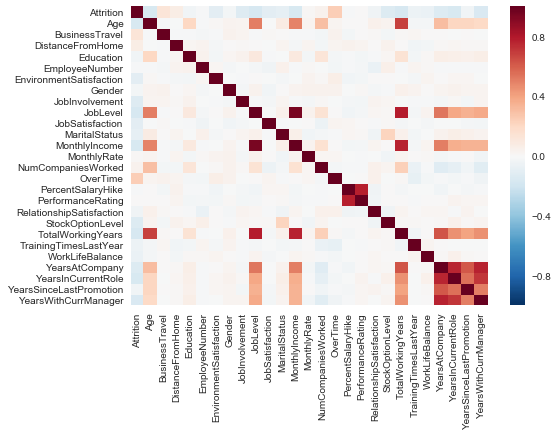

In [22]:
# plotting the correlation matrix
sns.heatmap(data.corr())
plt.show()

In [23]:
#checking the missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
Attrition                   1470 non-null int8
Age                         1470 non-null int64
BusinessTravel              1470 non-null int8
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int8
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null int8
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 

In [24]:
# descriptive analytics
data.describe()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,1.086395,9.192517,2.912925,1024.865306,2.721769,0.400000,2.729932,2.063946,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,0.532170,8.106864,1.024165,602.024335,1.093082,0.490065,0.711561,1.106940,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,1.000000,2.000000,2.000000,491.250000,2.000000,0.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,1.000000,7.000000,3.000000,1020.500000,3.000000,0.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,3.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,2.000000,29.000000,5.000000,2068.000000,4.000000,1.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
# joining the departments
data = data.join(department2)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales
0,1,41,1,1,2,1,2,1,3,2,...,0,8,0,1,6,4,0,5,0,1
1,0,49,2,8,1,2,3,0,2,2,...,1,10,3,3,10,7,1,7,1,0
2,1,37,1,2,2,4,4,0,2,1,...,0,7,3,3,0,0,0,0,1,0
3,0,33,2,3,4,5,4,1,3,1,...,0,8,3,3,8,7,3,0,1,0
4,0,27,1,2,1,7,1,0,3,1,...,1,6,3,3,2,2,2,2,1,0


In [26]:
#joining Educational fields
data = data.join(field2)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,41,1,1,2,1,2,1,3,2,...,4,0,5,0,1,1,0,0,0,0
1,0,49,2,8,1,2,3,0,2,2,...,7,1,7,1,0,1,0,0,0,0
2,1,37,1,2,2,4,4,0,2,1,...,0,0,0,1,0,0,0,0,1,0
3,0,33,2,3,4,5,4,1,3,1,...,7,3,0,1,0,1,0,0,0,0
4,0,27,1,2,1,7,1,0,3,1,...,2,2,2,1,0,0,0,1,0,0


In [27]:
#joining Job roles
data = data.join(jr2)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,Other,Technical Degree,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,1,41,1,1,2,1,2,1,3,2,...,0,0,0,0,0,0,0,0,1,0
1,0,49,2,8,1,2,3,0,2,2,...,0,0,0,0,0,0,0,1,0,0
2,1,37,1,2,2,4,4,0,2,1,...,1,0,0,1,0,0,0,0,0,0
3,0,33,2,3,4,5,4,1,3,1,...,0,0,0,0,0,0,0,1,0,0
4,0,27,1,2,1,7,1,0,3,1,...,0,0,0,1,0,0,0,0,0,0


In [28]:
# learning the percentage of leavers
data["Attrition"].value_counts()/len(data)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [29]:
# importing the model
from sklearn.tree import DecisionTreeClassifier

In [30]:
# initializing the model
model = DecisionTreeClassifier(random_state=42)

In [31]:
# setting the inputs and output
# inputs are everything except the column Attrition
# output is the column Attrition
inputs = data.iloc[:,1:]
output = data["Attrition"]

In [32]:
# fitting the model
model.fit(inputs,output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [33]:
# checking the accuracy
model.score(inputs,output)*100

100.0

In [34]:
# importing the lib for exporting tree visualization code
from sklearn.tree import export_graphviz

In [35]:
# exporting the tree graph and then visualizing in webgraphviz.com
export_graphviz(model,"tree.dot")

In [36]:
# building new model with a max_depth specification
modelFit = DecisionTreeClassifier(max_depth=5, random_state=42)

In [37]:
train, test = train_test_split(data,test_size=0.3) 

In [38]:
len(test)

441

In [39]:
train, test = train_test_split(data,train_size=0.7)

In [40]:
len(train)

1029

In [41]:
model_4 = DecisionTreeClassifier(max_depth=5, random_state=42)

In [42]:
inputs_train,inputs_test,output_train,output_test = train_test_split(inputs,output,train_size=0.7)

In [43]:
model_4.fit(inputs_train,output_train)
model_4.score(inputs_test,output_test)*100

82.086167800453509

In [44]:
export_graphviz(model_4,"tree_4.dot")

In [45]:
# building a dataframe with importances
df = pd.DataFrame(index=list(data)[1:],data=model.feature_importances_)
df

,0
Age,0.072139
BusinessTravel,0.007965
DistanceFromHome,0.042512
Education,0.031547
EmployeeNumber,0.060051
EnvironmentSatisfaction,0.023415
Gender,0.020918
JobInvolvement,0.034168
JobLevel,0.015916
JobSatisfaction,0.044239


In [46]:
# sorting values by the only column we have in a descending order
df.sort_values(by=0, ascending=False)

,0
MonthlyIncome,0.122314
Age,0.072139
OverTime,0.060574
EmployeeNumber,0.060051
TotalWorkingYears,0.045182
StockOptionLevel,0.044631
JobSatisfaction,0.044239
DistanceFromHome,0.042512
TrainingTimesLastYear,0.038723
YearsInCurrentRole,0.037952
